In [53]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [54]:
cancer = load_breast_cancer()

In [55]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer["data"], cancer["target"], stratify=cancer["target"], random_state=42
)
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print(f"Accuracy on training set: {tree.score(X_train, y_train)}")
print(f"Accuracy on test set: {tree.score(X_test, y_test)}")

Accuracy on training set: 1.0
Accuracy on test set: 0.9370629370629371


In [56]:
tree = DecisionTreeClassifier(random_state=0, max_depth=4)
tree.fit(X_train, y_train)
print(f"Accuracy on training set: {tree.score(X_train, y_train)}")
print(f"Accuracy on test set: {tree.score(X_test, y_test)}")

Accuracy on training set: 0.9882629107981221
Accuracy on test set: 0.951048951048951


In [57]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree.dot", class_names=["malignant", "bening"],
                feature_names=cancer["feature_names"], impurity=False, filled=True)

In [16]:
print(cancer["feature_names"])

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


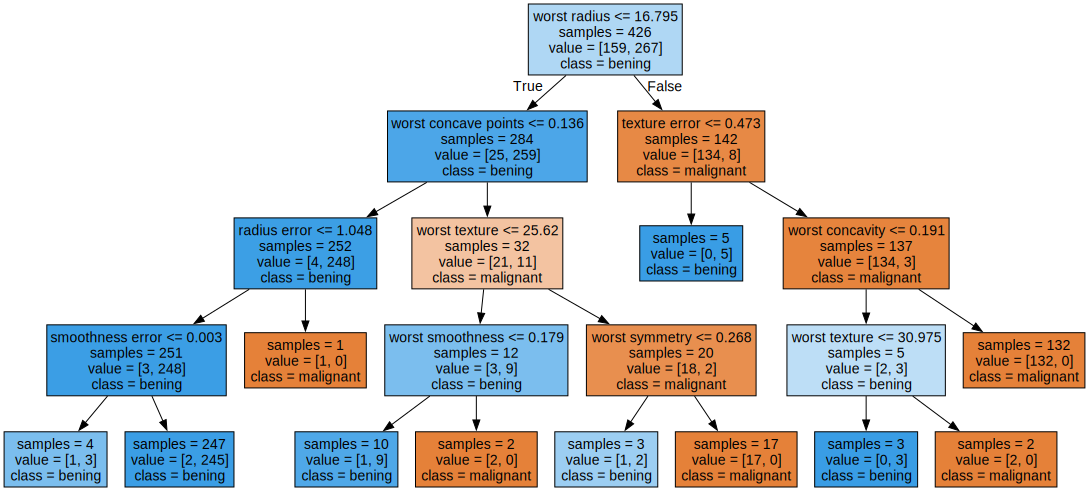

In [21]:
import graphviz
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [22]:
print(tree.feature_importances_)

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]


In [29]:
cancer["feature_names"]

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

<Axes: >

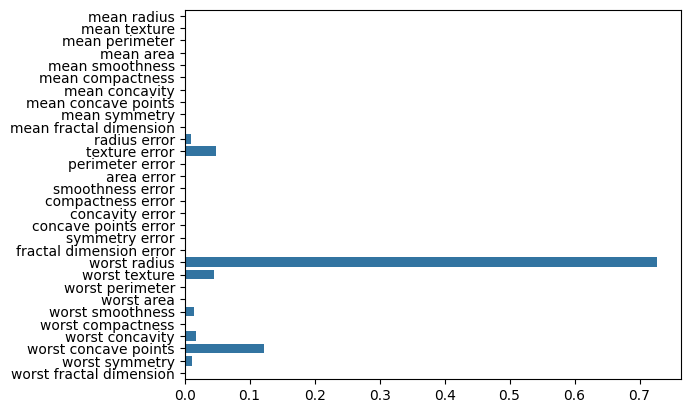

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.barplot(x=tree.feature_importances_, y=cancer["feature_names"], orient="h")

Feature importances: [0. 1.]


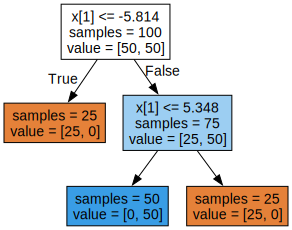

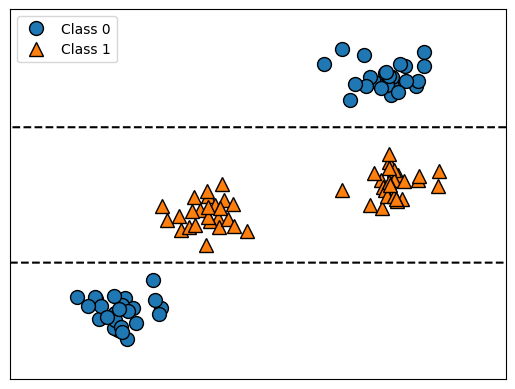

In [32]:
import mglearn
tree = mglearn.plots.plot_tree_not_monotone()
display(tree)

In [33]:
import os
import pandas as pd
ram_prices = pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH, "ram_price.csv"))


Text(0, 0.5, 'Price in $ / Mbyte')

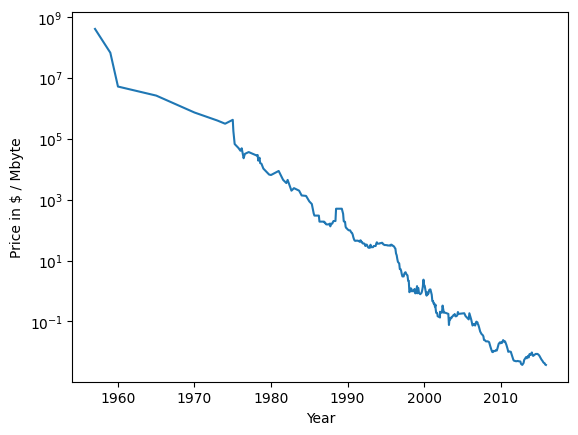

In [35]:
plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel("Year")
plt.ylabel("Price in $ / Mbyte")

In [43]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
import numpy as np

In [48]:
# 2000年までのデータを使って2000年以降の価格を予想する
data_train = ram_prices[ram_prices["date"] < 2000]
data_test = ram_prices[ram_prices["date"] >= 2000]

# 日付に基づいて価格を予測
X_train = np.array(data_train["date"])[:, np.newaxis]
y_train = np.log(data_train["price"])

tree = DecisionTreeRegressor().fit(X_train, y_train)
linear_reg = LinearRegression().fit(X_train, y_train)

X_all = np.array(ram_prices["date"])[:, np.newaxis]

pred_tree = tree.predict(X_all)
pred_lr = linear_reg.predict(X_all)

price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)

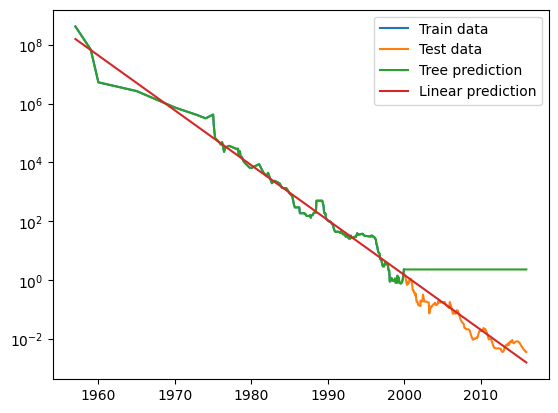

In [50]:
plt.semilogy(data_train["date"], data_train["price"], label="Train data")
plt.semilogy(data_test["date"], data_test["price"], label="Test data")
plt.semilogy(ram_prices["date"], price_tree, label="Tree prediction")
plt.semilogy(ram_prices["date"], price_lr, label="Linear prediction")
plt.legend()